### Syed Khundmir Azmi

## Task-1 The percentage of a student based on the no. of study hours.

Linear Regression involving two variables using Python.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('student_scores - student_scores.csv')

#### EDA and Visualization

In [15]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
df.shape

(25, 2)

In [17]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [19]:
df.isnull().values.any()

False

In [20]:
df.isna().values.any()

False

We have 0 missing values which is very good. Now let's do EDA with some cool graphs :).First we will see how the Scores are distributed according to given factor.

Text(0.5, 1.0, 'Distribution of Scores')

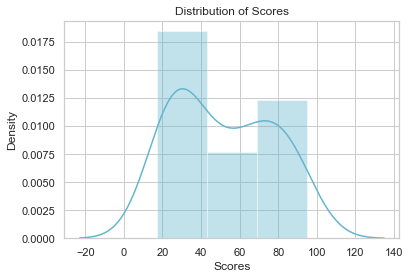

In [25]:
sns.set(style = 'whitegrid')
f , ax = plt.subplots(1,1,figsize =(6,4))
ax = sns.distplot(df['Scores'],kde = True,color = 'c')
plt.title('Distribution of Scores')

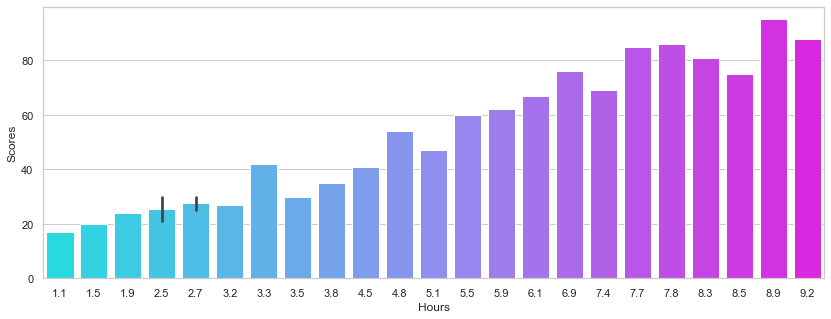

In [38]:
sns.set(style = 'whitegrid')
f , ax = plt.subplots(1,1,figsize=(14,5))
ax = sns.barplot(x = 'Hours',y = 'Scores',data =  df,palette = 'cool')

The above barplot depicts how much marks a student has scored in the exam after studying for given hours.

Now let's plot the data points,analyse how they are represented on a graph and plot a best-fit line.

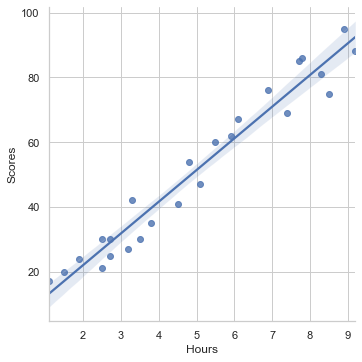

In [43]:
ax = sns.lmplot(x = 'Hours', y= 'Scores',data = df,palette = 'Set1')

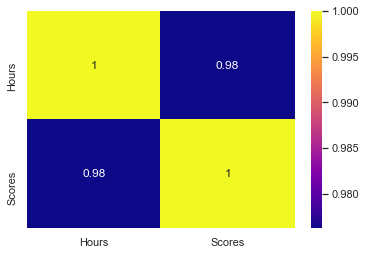

In [48]:
ax = sns.heatmap(df.corr(),annot = True,cmap = 'plasma')

The dependent variable that is 'Scores' is highly correlated to the independent variable 'Hours'. So we can say hours of study has high impact on marks scored by a student.

#### Model Training and Testing

In [225]:
x = df[['Hours']]
y = df[['Scores']]

In [236]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [237]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [238]:
model.fit(x,y)

LinearRegression()

In [239]:
y_predict = model.predict(x_test)

#### Comparing actual vs predicted

In [240]:
y_true = y_test.reset_index(drop = True)

In [241]:
y_pred = pd.DataFrame(y_predict)

In [242]:
accu_score = pd.concat([y_true,y_pred],axis = 1)
accu_score.columns = ['Y_true','Y_predict']
accu_score

,Y_true,Y_predict
0,86,78.734940
1,20,17.147378
2,76,69.936717
3,81,83.622842
4,95,89.488324


#### Mean Squared Error, Regression score function(r2)

In [243]:
from sklearn.metrics import mean_squared_error,r2_score

In [244]:
mean_squared_error(y_test,y_predict)

26.98796525123358

In [245]:
r2_score(y_test,y_predict)

0.9617213700623601

##### Conclusion:
    The model has low mean squared error and the regression score is around 96% which is very nice.